# Cylinder Volume

### Model:
* Tensorflow > 3 layer model (25,12,1)

### Callbacks 
* early stop
* print dots

### Data

* X_train (10000, 2)
* Y_train (10000, 1)

* X_test (500, 2)
* Y_test (500, 1)

In [2]:
import random
import numpy as np
import tensorflow as tf
import pandas as pd
import shutil

import matplotlib.pyplot as plt

### Loading the data

In [3]:
CSV_COLUMNS = ['volume', 'radius', 'height']
FEATURES = CSV_COLUMNS[1:len(CSV_COLUMNS)]
LABEL = CSV_COLUMNS[0]

dfc_train = pd.read_csv('./cyl_train01.csv', header = None, names = CSV_COLUMNS)
dfc_test = pd.read_csv('./cyl_test.csv', header = None, names = CSV_COLUMNS,dtype=np.float64, sep = ',')

X_train = np.array(dfc_train[['radius', 'height']]).T
Y_train = np.array(dfc_train[['volume']]).T
X_test = np.array(dfc_test[['radius', 'height']]).T
Y_test = np.array(dfc_test[['volume']]).T

In [4]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(2, 10000)
(1, 10000)
(2, 500)
(1, 500)


### Model

In [5]:
# model parameters
learning_rate = 0.01
training_epochs = 2000
batch_size = 100
display_step = 100

In [6]:
x = tf.placeholder(tf.float32, [2, None]) 
y = tf.placeholder(tf.float32, [1, None])

# Set model weights
W1 = tf.get_variable("W1", [25, 2], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [1, 12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())

In [7]:
# Build Model
Z1 = tf.add(tf.matmul(W1,x), b1)                                              # Z1 = np.dot(W1, X) + b1
A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
Z2 = tf.add(tf.matmul(W2,A1), b2)                                              # Z2 = np.dot(W2, a1) + b2
A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
Z3 = tf.add(tf.matmul(W3,A2), b3)

In [8]:
#Cost
cost = tf.losses.mean_squared_error(y, Z3)
#cost = tf.reduce_mean(tf.square(y - Z3))

In [9]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

costs = [[],[]]

with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(cost, feed_dict={x: X_train, y: Y_train}))
    # Training cycle
    for epoch in range(training_epochs):
        _, c = sess.run([optimizer, cost], feed_dict={x: X_train, y: Y_train})
        if (epoch+1) % 10 == 0:    
            costs[0].append(c)
            costs[1].append(cost.eval(feed_dict={x: X_test, y: Y_test}))
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    predictions = Z3.eval(feed_dict={x: X_test, y: Y_test})

Epoch: 0100 cost= 6.521336555
Epoch: 0200 cost= 3.823431253
Epoch: 0300 cost= 2.428086996
Epoch: 0400 cost= 1.692823887
Epoch: 0500 cost= 1.318762660
Epoch: 0600 cost= 1.115873456
Epoch: 0700 cost= 0.941919506
Epoch: 0800 cost= 0.827953696
Epoch: 0900 cost= 0.737109780
Epoch: 1000 cost= 0.651557148
Epoch: 1100 cost= 0.594782591
Epoch: 1200 cost= 0.533106685
Epoch: 1300 cost= 0.490687758
Epoch: 1400 cost= 0.436771572
Epoch: 1500 cost= 0.389018416
Epoch: 1600 cost= 0.365872115
Epoch: 1700 cost= 0.321548015
Epoch: 1800 cost= 0.297438860
Epoch: 1900 cost= 0.271754533
Epoch: 2000 cost= 0.250284165


### Results

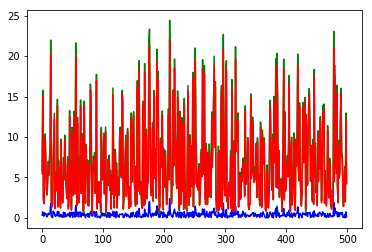

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.abs(Y_test - predictions)[0], color = 'blue')
plt.plot(Y_test[0], color = 'green')
plt.plot(predictions[0], color = 'red')

In [12]:
## number of preds where absolute error is larger than 1.5
error = predictions - Y_test
print(np.sum(abs(error) > 1.5))

7
